#Declarar librerías


In [2]:
# Importar librería de Google Drive
from google.colab import drive
# Importar librería pandas
import pandas as pd
# Importar Pandas
import numpy as np
# Importar librerís de JSON
import json
# Librería de gráficos
import matplotlib.pyplot as plt
# Librería de fecha
from datetime import datetime



# Importar Datasets

In [3]:
# Importar archivos del ejercicio
drive.mount('/content/drive')
# Rutas de los archivos de la práctica
path1="/content/drive/MyDrive/Practica 1/H1.csv"
path2="/content/drive/MyDrive/Practica 1/H2.csv"
ds1= pd.read_csv(path1,delimiter=' *, *')
ds2= pd.read_csv(path2,delimiter=' *, *')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


#Unir Dataset

In [4]:
#Unir datasets
df = pd.concat([ds1, ds2])
print(df.shape)
#Ordenar el Index
df=df.reset_index(drop=True)
df.columns

(119390, 31)


Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

##Limpieza de registros


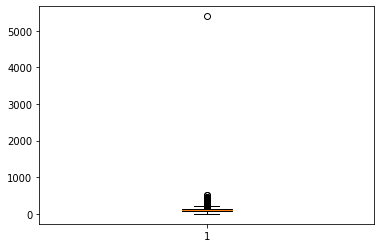

In [23]:
#Comparar datos del data set

fig, ax = plt.subplots()
ax.boxplot(df['ADR'])
plt.show()

#Limpieza del dataset

Se quita un registro de ADR que llega a los + 5000, además un registro que se descubrío más adelatne durante la selección de características que era negativo.

También se obtiene las listas de nulos para ver si es necesario completar información en estos campos

In [6]:
#Quitar outliner
df_s= df.drop(df[df['ADR']>5000].index)
#Quitar resultados negativos en ADR
df_s= df_s.drop(df[df['ADR']<0].index)
print(df.shape,df_s.shape)
##Lista de nulos
print(df_s.isnull().sum())

(119390, 31) (119388, 31)
IsCanceled                          0
LeadTime                            0
ArrivalDateYear                     0
ArrivalDateMonth                    0
ArrivalDateWeekNumber               0
ArrivalDateDayOfMonth               0
StaysInWeekendNights                0
StaysInWeekNights                   0
Adults                              0
Children                            4
Babies                              0
Meal                                0
Country                           488
MarketSegment                       0
DistributionChannel                 0
IsRepeatedGuest                     0
PreviousCancellations               0
PreviousBookingsNotCanceled         0
ReservedRoomType                    0
AssignedRoomType                    0
BookingChanges                      0
DepositType                         0
Agent                           16340
Company                        112591
DaysInWaitingList                   0
CustomerType            

* Los niños se rellenaron con promedios
* Los agentes se completaron con 0 (Se hizo por que no se encontró que existiera ese código, si existía previamente esto arruinaría la columna)
* Las compañias se guardaron un valor 0 (Se hizo por que no se encontró que existiera ese código, si existía previamente esto arruinaría la columna)
* Se descartó todos los registros donde el fila no tenía un país.


In [7]:
df_nn=df_s
# Se deja los campos de niño en 0, por que el registro de la fila sigue siendo valido
df_nn['Children']=df_nn['Children'].fillna(np.mean(df_nn['Children']), inplace=False)
# Se reemplaza los nulos de Agent con 0
df_nn['Agent']=df_nn['Agent'].fillna(0.0, inplace=False)
# Se reemplaza los nulos de company con 0
df_nn['Company']=df_nn['Company'].fillna(0.0, inplace=False)
# Quitar  nulos de País
df_nn = df_nn[df_nn['Country'].notna()]
print(df_nn.isnull().sum(),df_s.shape, df_nn.shape)

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

### Se muestra una lista de los columnas y sus posibles valores

Era necesario validar si distintas variables dispuestas por columnas

In [8]:
## ver valores en cada columna
for i in df_nn.columns:
  try:
    print("Valores de "+ i + ":",df_nn[i].unique().tolist() )
  except:
    print("################# Error con columna #####################"+ i)  

Valores de IsCanceled: [0, 1]
Valores de LeadTime: [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, 24, 103, 366, 249, 22, 91, 11, 108, 106, 31, 87, 41, 304, 117, 59, 53, 58, 116, 42, 321, 38, 118, 56, 49, 317, 6, 57, 19, 25, 315, 123, 46, 89, 61, 312, 299, 130, 74, 298, 119, 20, 286, 136, 129, 124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135, 150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160, 161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 356, 142, 328, 144, 336, 248, 302, 175, 344, 382, 146, 170, 166, 338, 167, 310, 148, 165, 172, 171, 145, 121, 178, 305, 173, 152, 354, 347, 158, 185, 349, 183

## Se transforman las variables categoricas a ordinales

*La alerta que aparece al final de esta sección aparece por que se ha reemplazado los valores dentro de las filas sin usar una operación lógica que permita identificar que valores deben ser reemplazados. Si no fuera por que busco reemplazar los todos los valores de la columnas por los sobrescritos on .map() se debería declarar de esta forma la variable df.loc[df.A > 5, 'A'] = 1000*


* Los meses de arribo de reemplazaron con su respectivo número en calendario
* La comida se reemplazo con un número equivalente a su posición, SC y Undefined se categorizaron como 0 por el comentario en la página web del dataset, donde se menciona que cualquiera de las 2 variables se debe considerar que no hubo servicio.
* Los paises se reemplazan con un número en base a la ejecución del ciclo FOR. La variable A (JSON) registra cual es el número por cada país.
* Canales de distribución se reemplaza por un número equivalente.
* Tipo de habitación reservada se reemplaza por un número equivalente.
* Tipo de habitación asignada se reemplaza por un número equivalente.
* Segmento de mercado se divide en varias columnas con la función Dummy.
  * Se encontró que ciertos mercados tenían una alta corralación con la razón del cancelamiento. Por lo mismo se trato de utilizar ampliamente esta función en las distintas colummas pero esto hizo colapsar el cuaderno.
  * Por lo anterior descrito se preferencio usar .MAP()
* Tipo de deposito se reemplaza por un número equivalente.
Tipo de cliente se reemplaza por un número equivalente.
* Estado de reservación se reemplaza por un número equivalente.
  * Mantiene una correlación del -0.98 con la variable isCanceled

* Se crea columna con la suma de los días de una reserva
* Se suma la cantidad de personas de la reserva
* La fecha de reserva se dividío en 3 columnas, por año/mes/día

In [9]:
# Cambio de valores en las columnas
df_test=df_nn
#Mes
df_test['ArrivalDateMonth']=df_test['ArrivalDateMonth'].map({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12, 'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6})

#Comida - Se conbina SC y Undifined como una misma variable
df_test['Meal']=df_test['Meal'].map({'BB':3, 'FB':2, 'HB':1, 'SC':0, 'Undefined':0})

# Conversión de paises a números
a={}
for idx,item in enumerate(df_test['Country'].unique().tolist()):
    a[item]=idx
pais=df_test['Country'].map(a)
df_test['Country']=pais
# Conversión de DistributionChannel
df_test['DistributionChannel']=df_test['DistributionChannel'].map({'Direct':3, 'Corporate':2, 'TA/TO':1, 'Undefined':0, 'GDS':4})

# Conversión de ReservedRoomType
df_test['ReservedRoomType']=df_test['ReservedRoomType'].map({'C':3, 'A':1, 'D':4, 'E':5, 'G':6, 'F':7, 'H':8, 'L':9, 'B':2, 'P':10})

# Conversión de AssignedRoomType
df_test['AssignedRoomType']=df_test['AssignedRoomType'].map({'C':3, 'A':1, 'D':4, 'E':5, 'G':6, 'F':7, 'I':8, 'B':2, 'H':9, 'L':10, 'K':11, 'P':12})

#Conversión de segmentos de mercado
#df_test['MarketSegment']=df_test['MarketSegment'].map({'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4, 'Complementary':5, 'Groups':6, 'Undefined':0, 'Aviation':7})
df_test = pd.get_dummies(df_test, columns = ['MarketSegment'], prefix="MarketSegment")

#Conversión de tipo de deposito
df_test['DepositType']=df_test['DepositType'].map({'No Deposit':1, 'Refundable':2, 'Non Refund':0})

#Conversión de tipo de cliente
df_test['CustomerType']=df_test['CustomerType'].map({'Transient':3, 'Contract':4, 'Transient-Party':2, 'Group':1})

#Conversión de tipo de reservación de datos
df_test['ReservationStatus']=df_test['ReservationStatus'].map({'Check-Out':2, 'Canceled':1, 'No-Show':0})

#Suma de días de previo al arribo y total de clientes
df_test['t_days']= df_test['ArrivalDateWeekNumber']+ df_test['ArrivalDateDayOfMonth']
df_test['t_client']= df_test['Adults'] + df_test['Children'] + df_test['Babies'] 


# Conversión de las fechas de reservación
df_test['ReservationStatusDate']=pd.to_datetime(df_test['ReservationStatusDate'])
df_test['reservation_year']=df_test['ReservationStatusDate'].dt.year
df_test['reservation_month']=df_test['ReservationStatusDate'].dt.month
df_test['reservation_day']=df_test['ReservationStatusDate'].dt.day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Se validan las columnas resultantes del trabajo anterior.

In [10]:
df_test


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,t_days,t_client,reservation_year,reservation_month,reservation_day
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,28,2.0,2015,7,1
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,28,2.0,2015,7,1
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,28,1.0,2015,7,2
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,28,1.0,2015,7,2
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,0,1,0,28,2.0,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,1,0,0,65,2.0,2017,9,6
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,0,1,0,66,3.0,2017,9,7
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,0,1,0,66,2.0,2017,9,7
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,0,1,0,66,2.0,2017,9,7


* Se elimina de X Is canceled por ser el eje Y 
* Se quita ReservationStatusDate por que esta misma variable es una fecha y se transformo en 3 columnas en el proceso anterior.
* Se quita ReservationStatus por ser una métrica equivalente al eje Y (Ambas métricas tienen una correlación del -0.98).


In [11]:
x=df_test.drop(['IsCanceled','ReservationStatusDate','ReservationStatus'], axis=1)
y=df_test['IsCanceled']

## Se aplica el proceso de selección de caractesrísticas
* Correlación de pearson
* CHI cuadrado
* RFE (Esta presenta un sesgo por que solo esta operando con los primeros 100 registros del dataset, con el proposito de que pueda operar)

In [12]:
# Ejemplo de metodos de selección: Correlación

#Se importa la librería r_regression
from sklearn.feature_selection import r_regression

# Se procesan los datos y se obtiene la correlación de cada columna en relación a isCanceled (y)
r_seleccion= r_regression(x, y, center=True)
cols_x=x.columns.tolist()
df_r=pd.DataFrame({
    'Variable':cols_x,
    'Valor':r_seleccion
})

# Se importa la librería que evalua el CHI cuadrado
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Se procesa todas las columnas, esperando saber cual de las 3 de 4 columnas son más significativas
chi2 = SelectKBest(chi2, k=3).fit_transform(x, y)
#print(chi2,x[['DepositType','TotalOfSpecialRequests','LeadTime','AssignedRoomType']])

df_r

,Variable,Valor
0,LeadTime,0.291957
1,ArrivalDateYear,0.016350
2,ArrivalDateMonth,0.010330
3,ArrivalDateWeekNumber,0.007485
4,ArrivalDateDayOfMonth,-0.006192
5,StaysInWeekendNights,-0.002609
6,StaysInWeekNights,0.024124
7,Adults,0.058408
8,Children,0.004752
9,Babies,-0.032523


In [13]:
## Importa la librería
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select=6, step=3)
selector = selector.fit(x[:100],y[:100])

selected_rfe_features = pd.DataFrame({'Feature':cols_x, 'Ranking':selector.ranking_})
selected_rfe_features

,Feature,Ranking
0,LeadTime,8
1,ArrivalDateYear,9
2,ArrivalDateMonth,10
3,ArrivalDateWeekNumber,10
4,ArrivalDateDayOfMonth,6
5,StaysInWeekendNights,1
6,StaysInWeekNights,3
7,Adults,4
8,Children,3
9,Babies,12


In [14]:
from sklearn.model_selection import train_test_split

#Hacer los set de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((95120, 40), (23780, 40), (95120,), (23780,))

# Se aplica PCA al conjunto de datos preprocesados

In [15]:
# Aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
#Se redimencionan el set de datos para ser 2 dimensiones, para esto se reestructura las variables de entrenamiento
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((95120, 2), (23780, 2), (95120,), (23780,))

In [17]:
# estandarizamos escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std

array([[ 2.22343629, -1.63625183,  0.14480324, ..., -1.52989207,
         0.19897797, -1.6706897 ],
       [ 5.91837247, -1.63625183,  0.14480324, ..., -1.52989207,
         0.19897797, -1.6706897 ],
       [-0.91024376, -1.63625183,  0.14480324, ..., -1.52989207,
         0.19897797, -1.55678735],
       ...,
       [-0.6576785 ,  1.19069299,  0.46874358, ...,  1.26573043,
         0.79704112, -0.98727563],
       [ 0.04389166,  1.19069299,  0.46874358, ...,  1.26573043,
         0.79704112, -0.98727563],
       [ 0.94190147,  1.19069299,  0.46874358, ...,  1.26573043,
         0.79704112, -0.98727563]])

## Adicional
Más abajo se aplica en predicciones del modelo de datos tratado, además de una gráfica que explica la varianza del dataset(Rescatados del ejemplo de PCA). Se entiende el objetivo de cada ejercicio, aun así no termino de entender las operaciones que se hacen en alguno de estos elementos.

In [24]:
#calculando la matriz de covarianzas
c=np.cov(np.array(x_std).T)

#calculando los vectores y valores propios
v, w = np.linalg.eig(c)
print('valores propios:', v)
print('vectores propios:', w)


valores propios: [ 4.33568576e+00  3.76534646e+00  2.78103391e+00  2.10404035e+00
  1.67633835e+00  1.57223434e+00  1.60424802e+00  1.58982458e-02
  5.05120892e-04  1.06273183e-01  1.61538652e-01  3.11052956e-01
  1.34801521e+00  1.31430597e+00  3.87287759e-01  1.23265792e+00
  1.20126321e+00  4.45459169e-01  4.71269318e-01  5.15982282e-01
  5.44019691e-01  5.83618999e-01  6.43426903e-01  1.12405984e+00
  7.13376369e-01  1.07097818e+00  1.04184389e+00  1.00552842e+00
  9.98928996e-01  9.78228703e-01  9.60034878e-01  7.63353575e-01
  9.02214117e-01  7.87928237e-01  8.68344510e-01  8.30927470e-01
  8.33087452e-01 -8.28412648e-16  1.53985924e-15  6.76918539e-16]
vectores propios: [[ 1.23547642e-01  2.60230440e-02  2.88697937e-01 ... -2.36636060e-16
   1.43784371e-15 -9.39511341e-16]
 [-3.43257765e-01  1.19918186e-01  5.91419526e-02 ...  5.52574426e-15
  -3.38323161e-15  1.25162269e-14]
 [ 3.47331592e-01 -2.83389825e-01 -5.64456023e-02 ... -1.41195723e-13
  -1.89453016e-13 -1.48843268e-13]

In [19]:
# calculando la varianza de los datos
v/40

array([ 1.08392144e-01,  9.41336615e-02,  6.95258477e-02,  5.26010088e-02,
        4.19084588e-02,  3.93058584e-02,  4.01062005e-02,  3.97456146e-04,
        1.26280223e-05,  2.65682957e-03,  4.03846630e-03,  7.77632390e-03,
        3.37003804e-02,  3.28576493e-02,  9.68219397e-03,  3.08164479e-02,
        3.00315802e-02,  1.11364792e-02,  1.17817330e-02,  1.28995570e-02,
        1.36004923e-02,  1.45904750e-02,  1.60856726e-02,  2.81014961e-02,
        1.78344092e-02,  2.67744545e-02,  2.60460971e-02,  2.51382106e-02,
        2.49732249e-02,  2.44557176e-02,  2.40008720e-02,  1.90838394e-02,
        2.25553529e-02,  1.96982059e-02,  2.17086128e-02,  2.07731868e-02,
        2.08271863e-02, -2.07103162e-17,  3.84964811e-17,  1.69229635e-17])

In [20]:
# ordenando y generando lista descendente
v2=np.sort(v/40)[::-1]
v2

array([ 1.08392144e-01,  9.41336615e-02,  6.95258477e-02,  5.26010088e-02,
        4.19084588e-02,  4.01062005e-02,  3.93058584e-02,  3.37003804e-02,
        3.28576493e-02,  3.08164479e-02,  3.00315802e-02,  2.81014961e-02,
        2.67744545e-02,  2.60460971e-02,  2.51382106e-02,  2.49732249e-02,
        2.44557176e-02,  2.40008720e-02,  2.25553529e-02,  2.17086128e-02,
        2.08271863e-02,  2.07731868e-02,  1.96982059e-02,  1.90838394e-02,
        1.78344092e-02,  1.60856726e-02,  1.45904750e-02,  1.36004923e-02,
        1.28995570e-02,  1.17817330e-02,  1.11364792e-02,  9.68219397e-03,
        7.77632390e-03,  4.03846630e-03,  2.65682957e-03,  3.97456146e-04,
        1.26280223e-05,  3.84964811e-17,  1.69229635e-17, -2.07103162e-17])

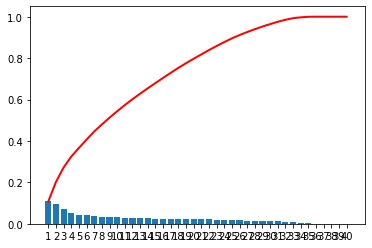

array([0.10839214, 0.20252581, 0.27205165, 0.32465266, 0.36656112,
       0.40666732, 0.44597318, 0.47967356, 0.51253121, 0.54334766,
       0.57337924, 0.60148073, 0.62825519, 0.65430129, 0.6794395 ,
       0.70441272, 0.72886844, 0.75286931, 0.77542466, 0.79713328,
       0.81796046, 0.83873365, 0.85843185, 0.87751569, 0.8953501 ,
       0.91143578, 0.92602625, 0.93962674, 0.9525263 , 0.96430803,
       0.97544451, 0.98512671, 0.99290303, 0.9969415 , 0.99959833,
       0.99999578, 1.00000841, 1.00000841, 1.00000841, 1.00000841])

In [21]:
fig = plt.figure('Gráfica de varianzas') # Figure
ax = fig.add_subplot(111) # Axes

nombres = np.arange(len(v))+1
datos = v2
xx = range(len(datos))
datos_acum = datos.cumsum() 
plt.plot(datos_acum, linestyle='-', linewidth=2.0,color='red')

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.show()
datos_acum

## Aplicando regresiones para validar el modelo

In [22]:
# Aplicando Regresion logistica 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Prediciendo el resultado el conjunto de prueba
y_pred = classifier.predict(x_test)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,x_train,y_train.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)


Logistic Regression: 66.09966358284274
Naive Bayes: 65.95668629100085
